In [ ]:
#!pip install pandas-profiling
#!pip3 install -U matplotlib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#import ydata_profiling
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
%matplotlib inline


In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import files
uploades = files.upload()

Saving superstore_data.csv to superstore_data.csv


In [ ]:
df1 = pd.read_csv('superstore_data.csv',header=0,sep=',')
df1.head()

,Id,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Response,Complain
0,1826,1970,Graduation,Divorced,84835.0,0,0,6/16/2014,0,189,...,111,189,218,1,4,4,6,1,1,0
1,1,1961,Graduation,Single,57091.0,0,0,6/15/2014,0,464,...,7,0,37,1,7,3,7,5,1,0
2,10476,1958,Graduation,Married,67267.0,0,1,5/13/2014,0,134,...,15,2,30,1,3,2,5,2,0,0
3,1386,1967,Graduation,Together,32474.0,1,1,11/5/2014,0,10,...,0,0,0,1,1,0,2,7,0,0
4,5371,1989,Graduation,Single,21474.0,1,0,8/4/2014,0,6,...,11,0,34,2,3,1,2,7,1,0


In [ ]:
df1.dtypes

Id                       int64
Year_Birth               int64
Education               object
Marital_Status          object
Income                 float64
Kidhome                  int64
Teenhome                 int64
Dt_Customer             object
Recency                  int64
MntWines                 int64
MntFruits                int64
MntMeatProducts          int64
MntFishProducts          int64
MntSweetProducts         int64
MntGoldProds             int64
NumDealsPurchases        int64
NumWebPurchases          int64
NumCatalogPurchases      int64
NumStorePurchases        int64
NumWebVisitsMonth        int64
Response                 int64
Complain                 int64
dtype: object

In [ ]:
from datetime import datetime, date
import datetime

today = datetime.date.today()

year = today.year

print(year)


# def age(born):
#     born = datetime.strptime(born, "%d/%m/%Y").date()
#     today = date.today()
#     return today.year - born.year - ((today.month, today.day) < (born.month, born.day))

2023


In [ ]:
df1['Age'] = year - df1['Year_Birth']

In [ ]:
df1.head()

,Id,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Response,Complain,Age
0,1826,1970,Graduation,Divorced,84835.0,0,0,6/16/2014,0,189,...,189,218,1,4,4,6,1,1,0,53
1,1,1961,Graduation,Single,57091.0,0,0,6/15/2014,0,464,...,0,37,1,7,3,7,5,1,0,62
2,10476,1958,Graduation,Married,67267.0,0,1,5/13/2014,0,134,...,2,30,1,3,2,5,2,0,0,65
3,1386,1967,Graduation,Together,32474.0,1,1,11/5/2014,0,10,...,0,0,1,1,0,2,7,0,0,56
4,5371,1989,Graduation,Single,21474.0,1,0,8/4/2014,0,6,...,0,34,2,3,1,2,7,1,0,34


In [ ]:
df = df1.drop('Year_Birth', axis=1)

In [ ]:
df = df.drop('Id', axis=1)

In [ ]:
df = df.drop('Dt_Customer', axis=1)

In [ ]:
df.head()

,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Response,Complain,Age
0,Graduation,Divorced,84835.0,0,0,0,189,104,379,111,189,218,1,4,4,6,1,1,0,53
1,Graduation,Single,57091.0,0,0,0,464,5,64,7,0,37,1,7,3,7,5,1,0,62
2,Graduation,Married,67267.0,0,1,0,134,11,59,15,2,30,1,3,2,5,2,0,0,65
3,Graduation,Together,32474.0,1,1,0,10,0,1,0,0,0,1,1,0,2,7,0,0,56
4,Graduation,Single,21474.0,1,0,0,6,16,24,11,0,34,2,3,1,2,7,1,0,34


In [ ]:
df.dtypes

Education               object
Marital_Status          object
Income                 float64
Kidhome                  int64
Teenhome                 int64
Recency                  int64
MntWines                 int64
MntFruits                int64
MntMeatProducts          int64
MntFishProducts          int64
MntSweetProducts         int64
MntGoldProds             int64
NumDealsPurchases        int64
NumWebPurchases          int64
NumCatalogPurchases      int64
NumStorePurchases        int64
NumWebVisitsMonth        int64
Response                 int64
Complain                 int64
Age                      int64
dtype: object

In [ ]:
from sklearn.utils import shuffle
df = shuffle(df)

<Axes: >

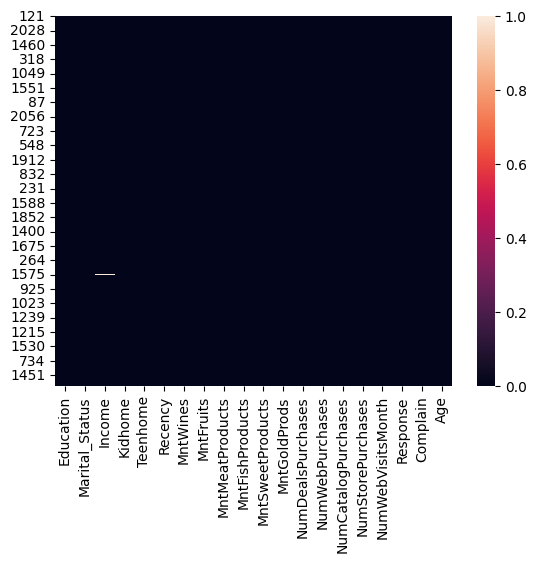

In [ ]:
#check null value
sns.heatmap(df.isnull())

In [ ]:
df.fillna(df.mode().iloc[0], inplace=True)

<Axes: >

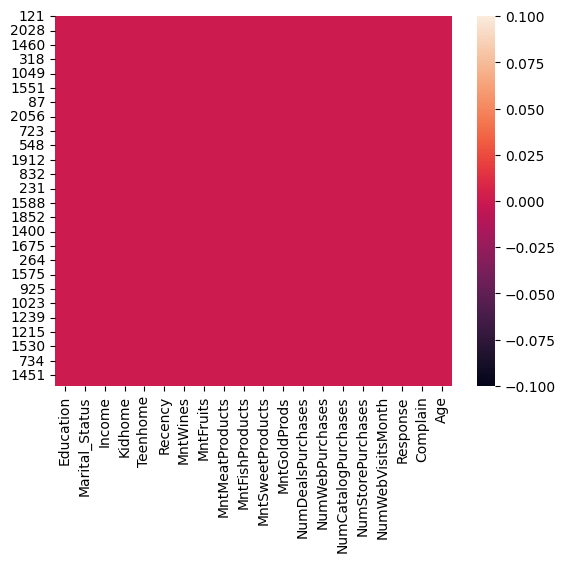

In [ ]:
#check null value
sns.heatmap(df.isnull())

In [ ]:
nominal = ['Education','Marital_Status']
for i in nominal:
        df = pd.concat([df,pd.get_dummies(df[i], prefix=i)],axis=1)
        df.drop([i],axis=1, inplace=True)

In [ ]:
df.head()

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,Education_Master,Education_PhD,Marital_Status_Absurd,Marital_Status_Alone,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Marital_Status_Together,Marital_Status_Widow,Marital_Status_YOLO
121,71434.0,0,1,4,711,36,217,172,96,168,...,0,0,0,0,0,1,0,0,0,0
20,36634.0,0,1,0,213,9,76,4,3,30,...,1,0,0,0,0,0,0,1,0,0
322,48985.0,0,1,13,19,13,18,10,7,8,...,0,0,0,0,0,1,0,0,0,0
594,26646.0,1,0,26,11,4,20,10,3,5,...,0,0,0,0,0,0,0,1,0,0
981,33986.0,1,0,43,16,2,18,2,1,5,...,0,0,0,0,1,0,0,0,0,0


In [ ]:
df.to_csv('Superstore_preprocessed.csv', encoding='utf-8', index=False)

In [ ]:
X = df.drop(['Response'],axis=1)
y = df['Response']

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.3 ,random_state=42)

In [ ]:
from sklearn.model_selection import RepeatedStratifiedKFold
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=10, random_state=10)

In [ ]:
param_grid = [{'n_estimators': range(50, 150, 10), 'max_depth' : range(1,10,1), }]
rf = RandomForestClassifier()
grid_search = GridSearchCV(rf, param_grid, cv=cv, return_train_score=True, n_jobs = -1)

In [ ]:
grid_search.fit(X_train, y_train)
grid_search.best_params_

{'max_depth': 9, 'n_estimators': 120}

In [ ]:
param_grid = [{'n_estimators': [120], 'max_depth' : [9], 'min_samples_leaf' : range(1,10,1),'min_samples_split': range(2,10,1),}]
rf = RandomForestClassifier()
grid_search = GridSearchCV(rf, param_grid, cv=cv, return_train_score=True, n_jobs = -1)

In [ ]:
grid_search.fit(X_train, y_train)
grid_search.best_params_

{'max_depth': 9,
 'min_samples_leaf': 1,
 'min_samples_split': 4,
 'n_estimators': 120}

In [ ]:
param_grid = [{'n_estimators': [120], 'max_depth' : [9], 'min_samples_leaf' : [1],'min_samples_split': [4],
               'max_features': ['sqrt','log2','None'],'bootstrap': [True,False],
               }]
rf = RandomForestClassifier()
grid_search = GridSearchCV(rf, param_grid, cv=cv, return_train_score=True, n_jobs = -1)

In [ ]:
grid_search.fit(X_train, y_train)
grid_search.best_params_

{'bootstrap': False,
 'max_depth': 9,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 4,
 'n_estimators': 120}

In [ ]:
grid_search.best_score_

0.865943305997029

In [ ]:
best_rf = grid_search.best_estimator_
best_rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=False, max_depth=9, min_samples_split=4,
                       n_estimators=120)

In [ ]:
pred_y = best_rf.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, classification_report,f1_score, recall_score, confusion_matrix
accuracy = accuracy_score(y_test, pred_y)
print(accuracy)
recall = recall_score(y_test, pred_y,average='macro')
print(recall)
precision = precision_score(y_test, pred_y,average='macro')
print(precision)
f1 = f1_score(y_test, pred_y,average='macro')
print(f1)
print('Classification report for Random forest Model:\n',classification_report(y_test, pred_y))

0.8571428571428571
0.5428108665243319
0.6626573426573427
0.5471189486689879
Classification report for Random forest Model:
               precision    recall  f1-score   support

           0       0.87      0.98      0.92       578
           1       0.45      0.11      0.17        94

    accuracy                           0.86       672
   macro avg       0.66      0.54      0.55       672
weighted avg       0.81      0.86      0.82       672



In [ ]:
print(confusion_matrix(y_test, pred_y))

[[566  12]
 [ 84  10]]
